![alt text](iSalud_Covecare.png 'Logo')

Fuente: 
- https://www.kaggle.com/scratchpad/notebook4031fa4176/edit
- https://www.kaggle.com/srikarkashyap/analyzing-healthcare-data-tutorial

# Analizando datos de programas de salud (EDA)

## Introducción

NTR Vaidya Seva (o Arogya Seva) es el programa de salud insignia del gobierno de Anhra Pradesh (India), con el cual las personas de bajos ingresos de ese estado pueden obtener salud pública de forma gratuita para muchas enfermedades y dolencias importantes

## A meter código!

Comenzamos importando las librerias necesarias:
* *Pandas* para cargar datos y explorar los datos
* *Matplotlib, Seaborn* para su visualización.

In [1]:
# Importamos las librerias 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Vamos a leer el archivo de datos usando la función *read_csv* de Pandas. *read_csv* puede leer de manera sencilla archivos de valores separados por comas (csv).

No existen restricciones para nombrar las variables. *df*, *data* son los términos genéricos más comunes. Arrancamos con *data*.

In [2]:
# Leemos el dataframe
data = pd.read_csv('https://github.com/matog/iSalud-IntroCienciaDeDatos/raw/main/ntrarogyaseva.zip')
# data = pd.read_csv('data/ntrarogyaseva.csv')

Explotamos los datos con la función *head()* que por defecto, muestra los primeros 5 datos.

In [13]:
data.sample(10)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
14258,14259,0,Male(Child),BC,M4,PEDIATRICS,M4.3.6.1,Medical Management of Convulsive Disorders/St...,Tenali(U),Tenali,...,6400,"Government General Hospital, Guntur",G,GUNTUR,Guntur,22/06/2016 00:00:00,28/06/2016 00:00:00,NO,NaN,D
21089,21090,44,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,24th Ward,Eluru Municipality,...,12500,District Hospital - Eluru,G,ELURU,West Godavari,18/07/2016 00:00:00,13/08/2016 00:00:00,NO,NaN,D
424817,424818,69,Male,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Thumma Konda,Chitvel,...,30000,Sri Sai Sudha Hospital,C,TIRUPATHI,Chittoor,23/08/2017 00:00:00,28/08/2017 00:00:00,NO,NaN,D
143705,143706,56,Female,BC,S12,MEDICAL ONCOLOGY,S12.1.3,Chemotherapy for Breast Cancer with Ac (Ac The...,Sattenapalli(U),Sattenapalle,...,3600,"Government General Hospital, Guntur",G,GUNTUR,Guntur,24/12/2016 00:00:00,24/12/2016 00:00:00,NO,NaN,CMO
446208,446209,76,Female,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Akaveedu,Racherla,...,30000,SANGHAMITRA HOSPITALS PVT LTD,C,ONGOLE,Prakasam,16/09/2017 00:00:00,18/09/2017 00:00:00,NO,NaN,D
61561,61562,57,Male,Minorities,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Mudinepalli,Mudinepalli,...,25600,AAYUSH NRI LEPL HEALTHCARE PVT LTD,C,VIJAYAWADA,Krishna,01/10/2016 00:00:00,06/10/2016 00:00:00,NO,NaN,D
313810,313811,7,Male(Child),OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Pedapalle,Alamuru,...,30000,Chakradhar Hospitals,C,RAJAHMUNDRY,East Godavari,19/05/2017 00:00:00,23/05/2017 00:00:00,NO,NaN,D
145550,145551,65,Female,BC,S3,OPHTHALMOLOGY SURGERY,S3.2.1,Therapeutic Penetrating Keratoplasty,Kunavaram,Razole,...,19500,Sri Kiran Institute Of Ophthalmology,C,Kakinada,East Godavari,23/12/2016 00:00:00,26/12/2016 00:00:00,NO,NaN,MC
444172,444173,22,Male,OC,S12,MEDICAL ONCOLOGY,S12.26.2,Chemotherapy for Acute Myeloid Leukemia with C...,Ravikampadu,Thondangi,...,60000,HOPE INTERNATIONAL HOSPITAL A UNIT OF PALAPART...,C,KAKINADA,East Godavari,22/09/2017 00:00:00,28/09/2017 00:00:00,NO,NaN,D
13742,13743,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-23,Visakhapatnam,...,7500,ADITYA MULTI CARE HOSPITAL,C,VISAKHAPATNAM,Vishakhapatnam,21/06/2016 00:00:00,19/07/2016 00:00:00,NO,NaN,P


In [14]:
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

Ahora vamos a mostrar algunas estadisticas simples de las columnas numéricas del dataset. Utilizamos la función *describe* de los datos para obtenerlas..

In [17]:
# Estadísticas descriptivas
# data.describe(include='all') # Incluye todas las variables
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000,479688.000000
mean,239844.500000,44.912264,30428.941698,27652.205861
std,138474.142301,18.961084,27441.592281,25951.706037
min,1.000000,0.000000,5.000000,2.000000
25%,119922.750000,34.000000,12500.000000,12500.000000
50%,239844.500000,47.000000,25000.000000,23200.000000
75%,359766.250000,59.000000,35000.000000,30600.000000
max,479688.000000,107.000000,520000.000000,520000.000000


Ahora analizamos los nombres de las columnas

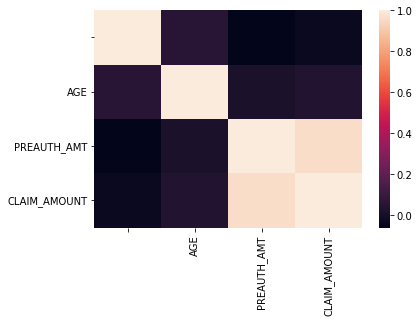

In [20]:
# Matriz de correlación. Texto y grafica. Descomentar la que se quiera ejecutar, y comentar la restante.
# data.corr()
sns.heatmap(data.corr());

In [ ]:
# Muestra los nombres de las columnas en el dataset _data_
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

### Tamaño del dataframe

In [30]:
data[['HOSP_DISTRICT']].value_counts()

HOSP_DISTRICT 
Guntur            60988
Vishakhapatnam    59334
East Godavari     58065
Chittoor          49172
Krishna           45174
Nellore           42405
Kurnool           33024
Hyderabad         27915
West Godavari     23769
Anantapur         18444
Prakasam          16756
Srikakulam        16137
Vizianagaram      13563
YSR Kadapa        13329
Ranga Reddy        1244
Khammam             346
Karimnagar           11
Mahabubnagar          6
Nizamabad             3
Warangal              3
dtype: int64

In [26]:
data.shape

(479688, 24)

### Creación de variables
Es muy útil trabajar con las variables existentes para generar nueva información.

In [35]:
# data['CATEGORY'] = data['CATEGORY_CODE'] + ' - ' + data['CATEGORY_NAME']
data[['CATEGORY_CODE', 'CATEGORY_NAME','CATEGORY']].sample(10)

,CATEGORY_CODE,CATEGORY_NAME,CATEGORY
55356,M4,PEDIATRICS,M4 - PEDIATRICS
88289,S15,POLY TRAUMA,S15 - POLY TRAUMA
49651,S5,ORTHOPEDIC SURGERY AND PROCEDURES,S5 - ORTHOPEDIC SURGERY AND PROCEDURES
300619,S12,MEDICAL ONCOLOGY,S12 - MEDICAL ONCOLOGY
17308,M7,NEUROLOGY,M7 - NEUROLOGY
437368,S15,POLY TRAUMA,S15 - POLY TRAUMA
234979,S11,SURGICAL ONCOLOGY,S11 - SURGICAL ONCOLOGY
241865,S15,POLY TRAUMA,S15 - POLY TRAUMA
49769,M6,NEPHROLOGY,M6 - NEPHROLOGY
393876,S12,MEDICAL ONCOLOGY,S12 - MEDICAL ONCOLOGY


In [36]:
data['DIFF'] = data['CLAIM_AMOUNT'] - data['PREAUTH_AMT']

In [40]:
data[['CLAIM_AMOUNT','PREAUTH_AMT', 'DIFF']]

,CLAIM_AMOUNT,PREAUTH_AMT,DIFF
0,11000,12500,-1500
1,11000,12500,-1500
2,11500,12500,-1000
3,11000,12500,-1500
4,11000,12500,-1500
...,...,...,...
479683,24910,24910,0
479684,45910,45910,0
479685,30000,30000,0
479686,23020,23020,0


In [44]:
# Eliminamos las variables recién creadas
data.drop(['DIFF', 'CATEGORY'], axis = 1, inplace = True)

In [45]:
data.head(2)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D


### Corrección de formatos 

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

Las columnas PREAUTH_DATE, CLAIM_DATE, SURGERY_DATE, DISCHARGE_DATE y MORTALITY_DATE son cargadas como si fueran del tipo Object, cuando en realidad deberían ser levantadas como fechas

In [47]:
from datetime import datetime

In [48]:
# Convertimos el campo DISCHARGE_DATE a fecha. Tira un error
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 116-04-30 00:00:00

In [51]:
# Buscamos el error:
# Alternativa I:
data.loc[data['DISCHARGE_DATE'].str.contains('116', na=False)]

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
1767,1768,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ratnapuram,Chintur,...,12500,District Hospital-Khammam-,G,KHAMMAM,Khammam,27/01/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D
2856,2857,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kusumanapalli,Bhadrachalam,...,12500,District Hospital-Khammam-,G,KHAMMAM,Khammam,02/03/2016 00:00:00,30/04/0116 00:00:00,YES,30/04/2016 00:00:00,D


In [56]:
# Buscamos el error:
# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00']

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION


In [53]:
# Reemplazamos los datos erroneos:
# Alternativa I
mappings = {'30/04/0116 00:00:00':'30/04/2016 00:00:00'}

In [55]:
data['DISCHARGE_DATE'] = data['DISCHARGE_DATE'].replace(mappings)

In [57]:
# Alternativa II
data.loc[data['AGE']=='30/04/0116 00:00:00', 'DISCHARGE_DATE'] = '30/04/2016 00:00:00'

In [59]:
# Convertimos el campo DISCHARGE_DATE a fecha nuevamente
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [ ]:
data['PREAUTH_DATE'] = pd.to_datetime(data['PREAUTH_DATE'])

In [ ]:
data['CLAIM_DATE'] = pd.to_datetime(data['CLAIM_DATE'])

In [ ]:
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])

In [60]:
data['SURGERY_DATE'] = pd.to_datetime(data['SURGERY_DATE'])

In [64]:
# Borramos la columna que tiene el índice del CSV 
data = data.drop('   ', axis = 1)

KeyError: "['   '] not found in axis"

In [65]:
data.to_csv('data/ntrarogyaseva_fixed.csv', index = False)

### NAN Values 

In [67]:
data.isnull().sum()
# data['DISCHARGE_DATE'].isnull().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64

In [68]:
# DISCHARGE_DATE tiene NAs porque pueden referirse a los pacientes que siguen internados o no tienen el alta
data.loc[data['DISCHARGE_DATE'].isna()]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,5000,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,11250,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,1028,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,5140,Tirumala Multi Speciality Hospitals (India )Pv...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,10000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,40000,MOTHER THERESA MULTI SPECIALITY,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D


In [72]:
# Podemos chequear si hay pacientes con DISCHARGE_DATE NA y que hallan fallecido
data.loc[(data['Mortality Y / N']=='YES') & (data['DISCHARGE_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
7,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,...,5000,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-05-05,NaT,YES,2014-05-23,D
10,52,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Rajam,Butchayyapeta,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2014-06-27,NaT,YES,2014-07-16,P
86,40,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dakamarri,Bheemunipatnam,Vishakhapatnam,...,6250,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,2015-02-23,NaT,YES,2015-10-03,D
97,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,Krishna,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-08-04,NaT,YES,2015-03-05,P
122,58,Female,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Mudunuruu,Vuyyuru,Krishna,...,11250,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,2015-06-15,NaT,YES,2015-08-23,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479300,69,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Badvel (P) (U),Badvel,YSR Kadapa,...,1028,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479305,60,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Garividi (Urban),Garividi,Vizianagaram,...,5140,Tirumala Multi Speciality Hospitals (India )Pv...,C,VIZIANAGARAM,Vizianagaram,2017-12-11,NaT,YES,2017-11-26,D
479372,67,Female,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ambapuram,Nellore,Nellore,...,10000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-10-11,NaT,YES,2017-11-11,D
479403,0,Male(Child),Minorities,M4,PEDIATRICS,M4.1.14,Medical Management of Term Baby With Severe Pe...,Guntur (U),Guntur,Guntur,...,40000,MOTHER THERESA MULTI SPECIALITY,C,NARSARAOPET,Guntur,2017-11-11,NaT,YES,2017-11-17,D


In [73]:
# Los MORTALITY_DATE en blanco, es porque no falleció o por error en la base
data.loc[(data['Mortality Y / N']=='NO') & (data['MORTALITY_DATE'].isna())]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-06-08,2013-07-09,NO,NaT,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-08,2013-09-09,NO,NaT,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-15,2013-10-18,NO,NaT,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-24,2013-09-27,NO,NaT,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,2013-08-31,2013-02-10,NO,NaT,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,...,24910,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-11-15,2017-11-19,NO,NaT,D
479684,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,...,45910,Manipal Health Enterprises PVT LTD,C,GUNTUR,Guntur,2017-11-17,2017-11-18,NO,NaT,D
479685,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,...,30000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,2017-11-16,2017-11-18,NO,NaT,D
479686,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,...,23020,Sankar Eye Hospital,C,GUNTUR,Guntur,2017-11-16,2017-11-18,NO,NaT,D


### map, apply, mapapply 

In [ ]:
# data = pd.read_csv('data/ntrarogyaseva_fixed.csv')

In [76]:
data['CASTE_NAME'].value_counts()

backward class      246164
other category      114123
scheduled caste      76742
Minorities           29150
scheduled tribes     13138
Others                 371
Name: CASTE_NAME, dtype: int64

| Sigla       | Definición|
|-----------|---------------------|
| OC:       | other category |
| BC:       | backward class    |
| SC:       | scheduded caste    |
| ST:       | scheduled tribes   |
| obc       |other backward class    |

In [75]:
# map: mapea valores de una serie
caste_mapper = { 'OC':'other category',
                 'BC':'backward class',
                 'SC':'scheduled caste',
                 'ST':'scheduled tribes',
                 'Minorities':'Minorities',
                 'Others':'Others'
}

data['CASTE_NAME'] = data['CASTE_NAME'].map(caste_mapper)

In [80]:
# Apply
# 'Aplica' una función a un eje del DataFrame
#     axis=0: Aplica la función a cada fila
#     axis=1: Aplica la función a cada columna


# Supongamos que el programa aplica una serie de descuentos sobre los costos de la operación según la edad
def calculate_total_cost(row):
    total_cost = 0
    if (row['AGE']<80) & (row['AGE']>69):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.20
    if (row['AGE']<70) & (row['AGE']>59):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.15
    if (row['AGE']<60) & (row['AGE']>49):
        total_cost = row['PREAUTH_AMT'] - row['PREAUTH_AMT']*0.10
    return total_cost


def calculate_group_age(row):
    AGE_CAT = ''
    if (row['AGE']<10) :
        AGE_CAT = 'Child'
    if (row['AGE']<18) & (row['AGE']>9):
        AGE_CAT = 'Young'
    return AGE_CAT

In [78]:
# data.apply(calculate_total_cost, axis=1)
data['DISCOUNT_COST'] = data.apply(calculate_total_cost, axis=1)

# data['GROUP_AGE'] = data.apply(calculate_group_age, axis=1)


In [79]:
data[['AGE', 'PREAUTH_AMT', 'DISCOUNT_COST']]

,AGE,PREAUTH_AMT,DISCOUNT_COST
0,56,12500,11250.0
1,37,12500,0.0
2,50,12500,11250.0
3,45,12500,0.0
4,54,12500,11250.0
...,...,...,...
479683,22,24910,0.0
479684,60,45910,39023.5
479685,38,30000,0.0
479686,59,23020,20718.0


In [94]:
# Generamos un dataframe mas chico para poder trabajar de manera rápida
data.groupby(['CASTE_NAME']).median().reset_index()
# data_cut.to_csv('data_cut_caste_groupby.csv', index = False)
data_cut

,CASTE_NAME,PREAUTH_AMT,CLAIM_AMOUNT
0,Minorities,947650789,859866110
1,Others,11502844,10162908
2,backward class,7397727683,6721286111
3,other category,3505849473,3226762404
4,scheduled caste,2336317105,2095633058
5,scheduled tribes,397350291,350720734


In [ ]:
# Si queremos sumar los valores de una columna  y crear una columna total, usamos axis=0

def add_everything(column):
    return column.sum()

In [ ]:
data_cut.loc['sum'] = data_cut.apply(add_everything, axis=0)
data_cut

In [93]:
# Applymap: Aplica una función a todo el dataframe

def show_len(element):
    return len(str(element))

data_cut.applymap(show_len)

,CASTE_NAME,PREAUTH_AMT,CLAIM_AMOUNT
0,10,9,9
1,6,8,8
2,14,10,10
3,14,10,10
4,15,10,10
5,16,9,9


## Analizando un poco mas profundo...

### Cual es la distribución de la variable SEX?

*value_counts()* es una función de Pandas que puede ser usada para obtener la distribución de los datos, en la columna que se especifique.

In [ ]:
# Cantidad de cada valor en la columna SEX
data['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

*CUIDADO*: Existe valores que están ingresados de forma diferente, que refieren al mismo valor. *Male* and *MALE* no representan valores diferentes! 

Es posible hacer un *replace* de los valores mal ingresados para normalizar la variable.
(Ademas de reemplazar Male (Child) -> Boy and Female (Child) -> Girl por conveniencia)

In [95]:
# Mapeamos para normalizar
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [97]:
# Reemplazamos los valores utilizando el mapping arriba definido
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

La visualización de esta información se puede hacer de manera sencilla utilizando la función gráfica que incluye Pandas.

In [101]:
data_sex = data['SEX'].value_counts()
data_sex

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

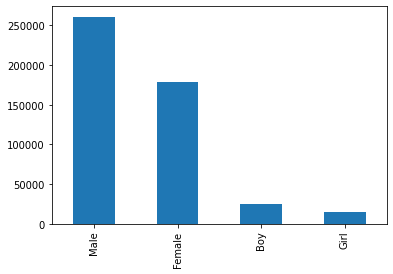

In [104]:
# Value count de Sex de forma gráfica
# data_sex.value_counts().plot.bar()
data['SEX'].value_counts().plot.bar();

### Cual es la distribución de la variable AGE?

Media, mediana y moda:

In [106]:
# print the mean, median and mode of the age distribution
print("Media: {}".format(data['AGE'].mean()))
print("Mediana: {}".format(data['AGE'].median()))
print("Moda: {}".format(data['AGE'].mode()))

Media: 44.91226380480646
Mediana: 47.0
Moda: 0    0
Name: AGE, dtype: int64


Top 10 de las edades mas repetidas.

In [111]:
# top 10 age
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

<AxesSubplot:>

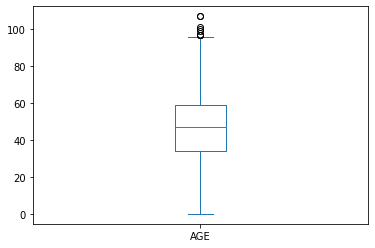

In [112]:
# boxplot para AGE
data['AGE'].plot.box()

En el grafico de arriba, la caja representa el **[Rango Intercuatilico (IQR, en inglés)](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)** de los datos. 


El IQR representa la región donde cae el 50% de los datos. Por ejemplo del 25% al 75% del dataframe.
Todo dato que cae fuera de 1.5 veces el IQR es considerado, en general, una anomalía (OJO, NO SIEMPRE, DEPENDE DEL CONOCIMIENTO DE LOS DATOS POR PARTE DEL ANALISTA)

Los círculos se considerarían _outliers_

La librería _Seaborn_ ofrece visualizaciones mejores, de forma sencilla.


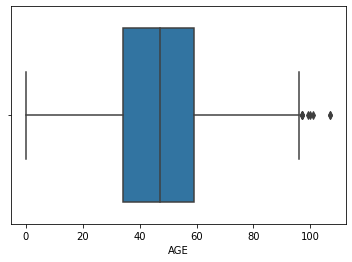

In [113]:
# sns.boxplot(data['AGE']) # Devuelve un warning, que se solucina definiendo x e y.
sns.boxplot(x=data['AGE']); # El ; evita la impresión de texto previo al gráfico.

### Preguntando y respondiendo con los datos

Una vez que hayamos realizado una pequeña exploración en los datos, ahora avancemos a realizarnos algunas preguntas para entender mejor el dataframe.

**Qué debería hacer si sólo quiero analizar los registros que pertenecen al distrito de Krishna?**

Deberí selecciononar un subconjunto de datos pertenencientes a Krishna. Pandas lo hace en dos sencillos pasos:

    1. Condición que se debe satisfacer: data['DISTRICT_NAME']=='Krishna'
    2. Insertamos la condición en el dataframe: [data['DISTRICT_NAME']=='Krishna']
      

In [118]:
# subset de datos que pertenecen al distrito de Krishna
krishna = data.loc[data['DISTRICT_NAME']=='Krishna']
krishna.to_csv('krishna_cut.csv', index = False)

In [119]:
data.loc[data['DISTRICT_NAME']=='Krishna'].to_csv('krishna_cut.csv', index = False)

**Estadísticas por categoria de operación**

Vamos a utilizar el _groupby_ de Pandas para construir estadísticas, agrupando los datos por la categoría de operación. El _groupby_ trabaja de forma similar al comando de _SQL_ del mismo nombre

In [124]:
data.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION', 'DISCOUNT_COST'],
      dtype='object')

In [126]:
# group by surgery para obtener estadísticas
data.groupby(['CATEGORY_NAME','SEX']).mean()
#data.groupby(['CATEGORY_NAME','HOSP_DISTRICT']).mean()

AGE   PREAUTH_AMT  \
CATEGORY_NAME                      SEX                               
CARDIAC AND CARDIOTHORACIC SURGERY Boy      4.013562  93489.256781   
                                   Female  53.477690  88877.845829   
                                   Girl     4.116635  86519.702677   
                                   Male    54.540619  85984.827489   
CARDIOLOGY                         Boy     11.133333  85490.666667   
...                                              ...           ...   
SURGICAL GASTRO ENTEROLOGY         Male    45.821070  66707.396321   
SURGICAL ONCOLOGY                  Boy     10.421053  39630.421053   
                                   Female  50.684096  42808.181713   
                                   Girl     8.500000  46669.894737   
                                   Male    52.049853  49753.387897   

                                           CLAIM_AMOUNT  DISCOUNT_COST  
CATEGORY_NAME                      SEX                                  
CARDIAC AND CARDIOTHORACIC SURGERY Boy     89437.787523       0.000000  
                                   Female  84843.775689   49627.930155  
                                   Girl    84019.333652       0.000000  
                                   Male    81080.929801   50665.026255  
CARDIOLOGY                         Boy     61929.000000       0.000000  
...                                                 ...            ...  
SURGICAL GASTRO ENTEROLOGY         Male    62079.110368   22414.826756  
SURGICAL ONCOLOGY                  Boy     34752.263158       0.000000  
                                   Female  40411.641629   20116.906125  
                                   Girl    43262.000000       0.000000  
                                   Male    46392.943482   23897.441189  

[105 rows x 4 columns]

Cochlear Implant Surgery es el que tiene la operación mas costosa. (₹520000 en promedio). Las Protesis (Prostheses) cuestan ₹1200 (las mas baratas). A su vez, el grupo mas joven también para ser el que demanada la Cochlear Implant Surgery: 1.58 años, mientras que Neurology  tiene pacientes de, en promedio, ~56.

In [139]:
#data.groupby(['HOSP_DISTRICT','CATEGORY_NAME'])['AGE'].mean().reset_index()
data.groupby(['CATEGORY_NAME','SEX']).agg({'AGE':'mean','MORTALITY_DATE':'count', 'DISCHARGE_DATE':'max'}).reset_index()



,CATEGORY_NAME,SEX,AGE,MORTALITY_DATE,DISCHARGE_DATE
0,CARDIAC AND CARDIOTHORACIC SURGERY,Boy,4.013562,62,2017-12-09
1,CARDIAC AND CARDIOTHORACIC SURGERY,Female,53.477690,391,2017-12-10
2,CARDIAC AND CARDIOTHORACIC SURGERY,Girl,4.116635,40,2017-12-09
3,CARDIAC AND CARDIOTHORACIC SURGERY,Male,54.540619,535,2017-12-10
4,CARDIOLOGY,Boy,11.133333,0,2017-10-24
...,...,...,...,...,...
100,SURGICAL GASTRO ENTEROLOGY,Male,45.821070,15,2017-12-09
101,SURGICAL ONCOLOGY,Boy,10.421053,0,2017-11-15
102,SURGICAL ONCOLOGY,Female,50.684096,45,2017-12-10
103,SURGICAL ONCOLOGY,Girl,8.500000,0,2017-12-09


**Que intervenciones están vinculadas a SURGERY**

In [141]:
data.loc[data['CATEGORY_NAME'].str.contains('SURGERY')].groupby(['SEX']).mean()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DISCOUNT_COST
SEX,,,,
Boy,7.295001,54169.084949,50582.253756,0.000000
Female,46.396697,45233.060813,42182.035286,20297.887297
Girl,6.639416,55306.632482,52280.439781,0.000000
Male,47.727112,51022.281661,47558.443743,25156.232899


**Edad minima y maxima por CATEGORY**

In [144]:
data.groupby(['CATEGORY_NAME']).agg(
    **{
        'Edad Promedio': ('AGE', 'mean'),
        'Edad Maxima': ('AGE', 'max'),
    }).reset_index()

,CATEGORY_NAME,Edad Promedio,Edad Maxima
0,CARDIAC AND CARDIOTHORACIC SURGERY,51.764553,90
1,CARDIOLOGY,54.652048,93
2,COCHLEAR IMPLANT SURGERY,1.581081,11
3,CRITICAL CARE,51.014649,90
4,DERMATOLOGY,46.573171,86
5,ENDOCRINOLOGY,45.066667,96
6,ENT SURGERY,32.521940,86
7,GASTROENTEROLOGY,41.662383,88
8,GENERAL MEDICINE,35.330161,89
9,GENERAL SURGERY,44.979473,92


**Operación mas común por grupo de edad**

Para encontrar la operación mas común por grupo de edad, vamos a redondear las edades al valor múltiplo de 10 mas cercano.

Hacemos una copia del dataframe para no _ensuciar_ el dataframe original.

In [146]:
dataround = data.copy()

Utilizamos la función _round_ de Pandas para redonder el valor de la edad. *-1* indica que redondeamos hasta1 dígito a la izquierda del valor decimal.

In [147]:
# round a la edad en 0 o 1
dataround['AGE'] = dataround['AGE'].round(-1)

Visualizamos los grupos de edad utilizando la función _Seaborn countplot_ 

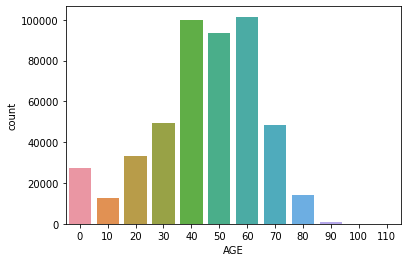

In [150]:
# frequency plot
sns.countplot(x=dataround['AGE']);

In [ ]:
res = dataround.groupby(['AGE', 'CATEGORY_NAME'], as_index=False)['SEX'].count()\
        .sort_values('SEX', ascending=False)\
        .drop_duplicates('AGE')\
        .sort_values('AGE')
        
res

,AGE,CATEGORY_NAME,SEX
16,0,PEDIATRICS,19395
44,10,POLY TRAUMA,3564
70,20,POLY TRAUMA,7631
97,30,POLY TRAUMA,8382
116,40,NEPHROLOGY,18972
143,50,NEPHROLOGY,19411
168,60,NEPHROLOGY,18050
199,70,POLY TRAUMA,9217
222,80,POLY TRAUMA,4762
243,90,POLY TRAUMA,445


#### Unir dataframes

Vamos a descargar la tabla de distritos del estado de Andhra Pradesh (https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh) con algunas variables adicionales, para pegarle datos del dataframe original a nivel distrito.

In [155]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Andhra_Pradesh'
df_wiki = pd.read_html(wiki_url, header=0)[1]
df_wiki

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km)
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07
7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48
8,KN,Konaseema,Amalapuram,3,22,1719093,2083,825.30
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18


Vamos a agregar ua columna en la tabla extraída de wikipedia con la cantidad de personas de cada Distrito, que aparece en la base del programa de salud.

Para poder hacerlo, vamos a crear un nuevo dataframe que es el resultado de agrupar en la base del programa la cantidad de registros por distrito.

In [156]:
df_new = data.groupby(['HOSP_DISTRICT'])['AGE'].count().reset_index()
df_new

,HOSP_DISTRICT,AGE
0,Anantapur,18444
1,Chittoor,49172
2,East Godavari,58065
3,Guntur,60988
4,Hyderabad,27915
5,Karimnagar,11
6,Khammam,346
7,Krishna,45174
8,Kurnool,33024
9,Mahabubnagar,6


Vamos a cambiar el nombre de la columna AGE:

In [157]:
df_new.rename(columns = {'AGE': 'Cantidad de Personas en el programa'}, 
                inplace = True)

In [158]:
df_new

,HOSP_DISTRICT,Cantidad de Personas en el programa
0,Anantapur,18444
1,Chittoor,49172
2,East Godavari,58065
3,Guntur,60988
4,Hyderabad,27915
5,Karimnagar,11
6,Khammam,346
7,Krishna,45174
8,Kurnool,33024
9,Mahabubnagar,6


In [159]:
df_merged = pd.merge(df_wiki,
                    df_new,
                    left_on = 'Official name',
                    right_on = 'HOSP_DISTRICT',
                    how = 'left')

In [160]:
df_merged.reset_index()

,index,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),HOSP_DISTRICT,Cantidad de Personas en el programa
0,0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,Srikakulam,16137.0
1,1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN,NaN
2,2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,Vizianagaram,13563.0
3,3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN,NaN
4,4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN,NaN
5,5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN,NaN
6,6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN,NaN
7,7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48,East Godavari,58065.0
8,8,KN,Konaseema,Amalapuram,3,22,1719093,2083,825.30,NaN,NaN
9,9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN,NaN


Borramos la columna HOSP_DISTRICT

In [163]:
df_merged = df_merged[['Code[10]', 'Official name', 'Headquarters', 'Revenuedivisions',
       'Mandals', 'Population', 'Area(in sq.km)', 'Density(per sq.km)', 'Cantidad de Personas en el programa']]

In [164]:
df_merged

,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el programa
0,SR,Srikakulam,Srikakulam,3,30,2191471,4591,477.34,16137.0
1,PM,Parvathipuram Manyam,Parvathipuram,2,15,925340,3659,252.89,NaN
2,VZ,Vizianagaram,Vizianagaram,2,27,1930811,4122,468.42,13563.0
3,VS,Visakhapatnam,Visakhapatnam,2,11,1959544,1048,1869.79,NaN
4,AS,Alluri Sitharama Raju,Paderu,2,22,953960,12251,77.87,NaN
5,AK,Anakapalli,Anakapalli,2,24,1726998,4292,402.38,NaN
6,KK,Kakinada,Kakinada,2,21,2092374,3019,693.07,NaN
7,EG,East Godavari,Rajahmundry,2,20,1832332,2561,715.48,58065.0
8,KN,Konaseema,Amalapuram,3,22,1719093,2083,825.30,NaN
9,EL,Eluru,Eluru,3,28,2071700,6679,310.18,NaN


### Anomalías
Fuente: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [ ]:
# Leemos el dataset
# data = pd.read_csv('data/ntrarogyaseva_fixed.csv')

<AxesSubplot:xlabel='AGE', ylabel='CLAIM_AMOUNT'>

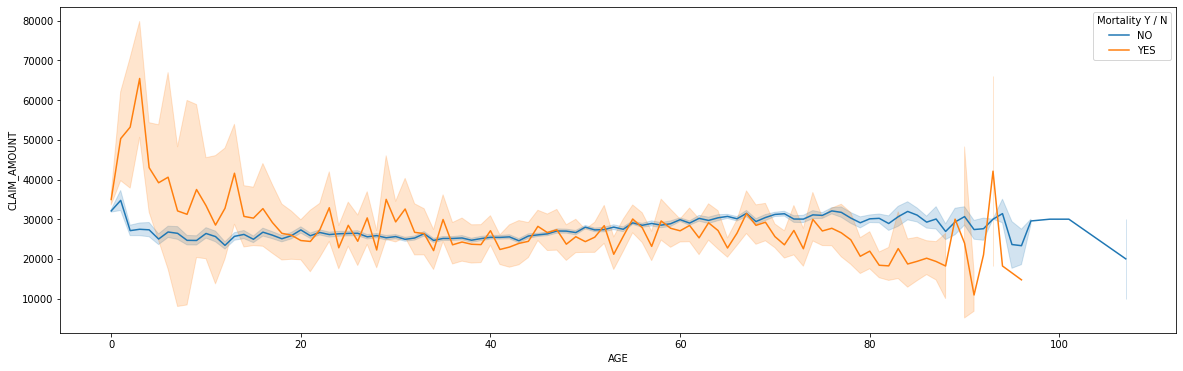

In [165]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x="AGE", y="CLAIM_AMOUNT", ci=95, hue="Mortality Y / N")
# sns.scatterplot(x='AGE', 
#              y='CLAIM_AMOUNT', 
#              data=data, 
#              color='g')

In [166]:
# Reducimos el DF para trabajar con mayor velocidad
# d1 = pd.to_datetime('2016-06-01')
# data_graph = data.loc[data['PREAUTH_DATE']<d1]

data_graph = data.loc[data['SURGERY_DATE']>'29/12/2016 00:00:00']

#data_graph = data_graph.copy()
data_graph.shape

(330905, 24)

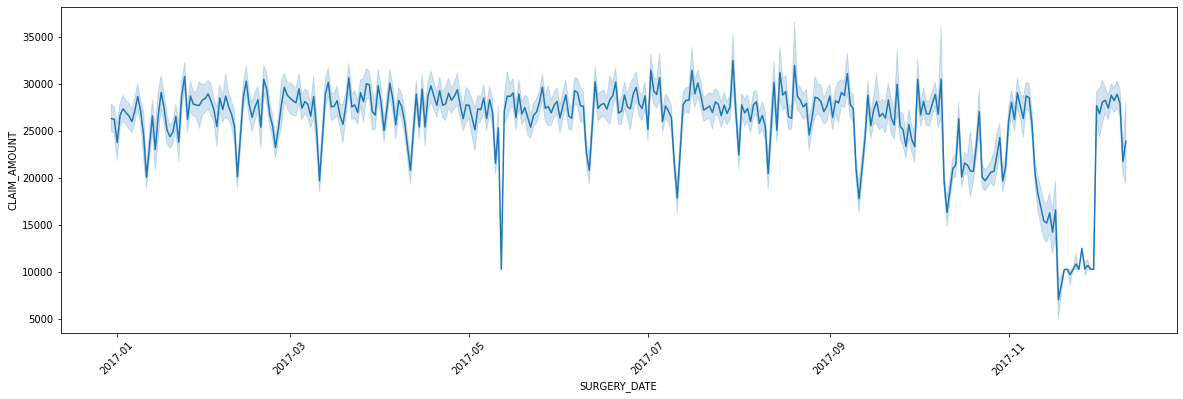

In [167]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data_graph, x="SURGERY_DATE", y="CLAIM_AMOUNT")
plt.xticks(rotation=45); # el ; oculta el texto previo al gráfico. El mismo resultado se logra con plt.show()

In [ ]:
data_graph.sort_values(by='SURGERY_DATE', ascending=False)
data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

#data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'] - 3*data_graph['CLAIM_AMOUNT']
#data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'] + 3*data_graph['CLAIM_AMOUNT']
# data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

/tmp/ipykernel_988056/304419442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_988056/304419442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
/tmp/ipykernel_988056/304419442.py:4: SettingWithCopyWarning: 
A value is trying to be set o

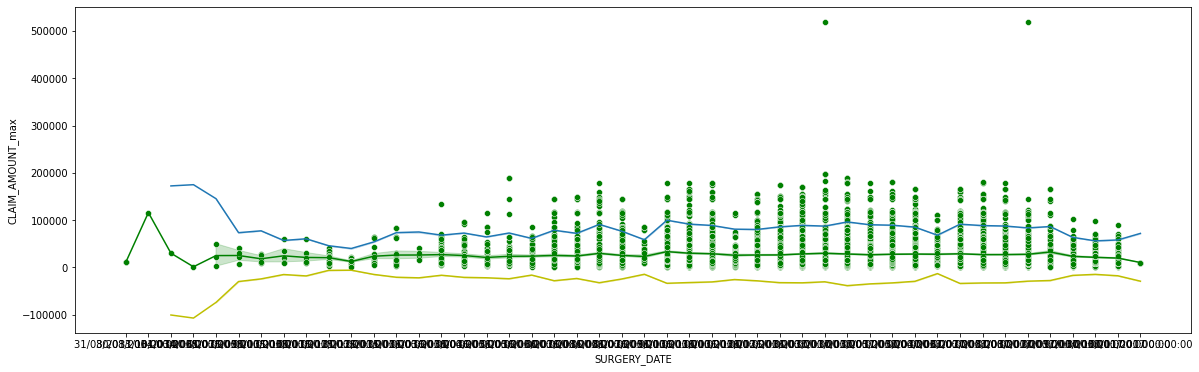

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

# ax.axes.set_title("Date and Claim Amount",fontsize=20)
# ax.set_xlabel("Date",fontsize=15)
# ax.set_ylabel("Claim Amount",fontsize=15)
# ax.tick_params(labelsize=5)
# plt.xticks(rotation=45)

plt.show()

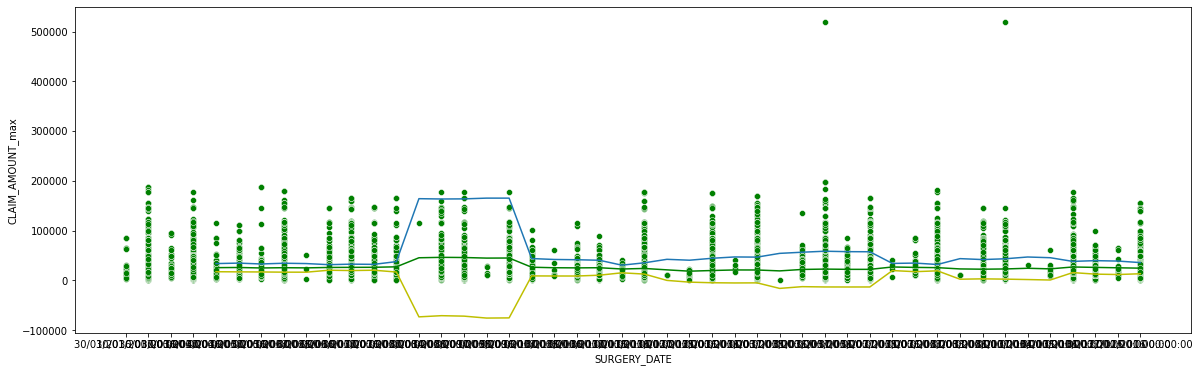

In [ ]:
# Agrupamos los datos por fecha, con el promedio del CLAIM_AMOUNT
graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

# Calculamos el la media movil para el CLAIM_AMOUNT y -+ 3 desvíos
graph.sort_values(by='SURGERY_DATE', ascending=False)
graph['CLAIM_AMOUNT_min'] = graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_max'] = graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_RM'] = graph['CLAIM_AMOUNT'].rolling(5).mean()

fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

#### Eliminar outliers

- Computamos el Z-score para la columna seleccionada, relativo a la media y al STD de esa columna
- Tomamos el valor absoluto del Z-score.

Si queremos calcular para todas las variables
- df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  
_all(axis=1)_  garantiza qeu para cada fila, todas las columnas satisfacen la restricciónensures that for each row, all column satisfy the constraint.


In [ ]:
from scipy import stats
import numpy as np
# graph_graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

data_graph = data_graph[(np.abs(stats.zscore(data_graph['CLAIM_AMOUNT'])) < 3)]

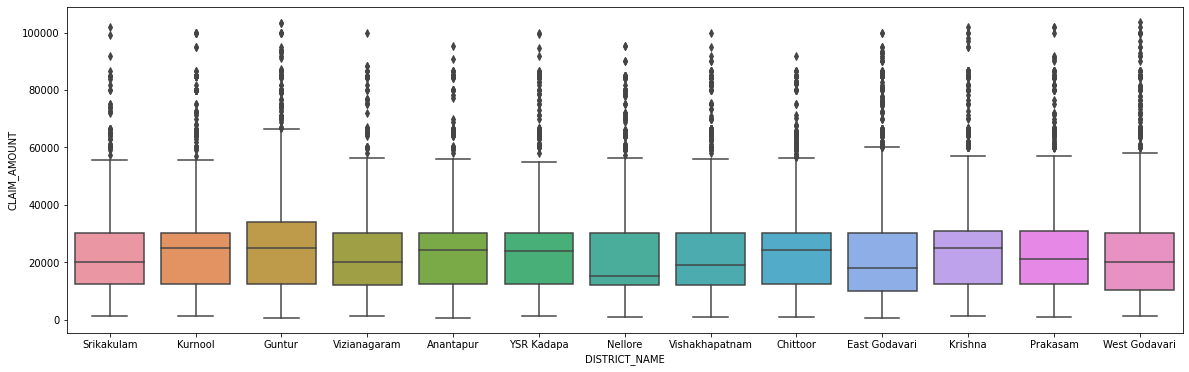

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);

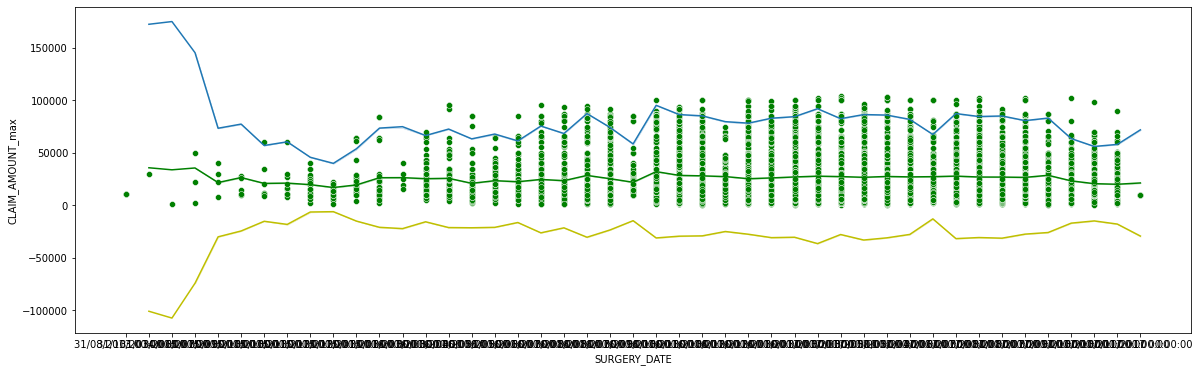

In [ ]:
# Graficamos las series sin los valores que exceden el z-score
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=data_graph, 
             color='g',
             ci=False)

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

### MAPA

In [ ]:
import geopandas

In [ ]:
dfg = geopandas.read_file('Census_2011/2011_Dist.shp')

In [ ]:
type(dfg)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dfg.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


<AxesSubplot:>

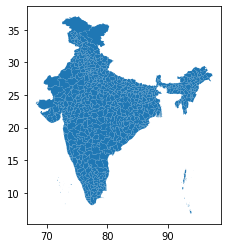

In [ ]:
dfg['geometry'].plot()

In [ ]:
df = pd.merge(dfg,
              df_merged,
              left_on = 'DISTRICT',
              right_on ='Official name',
              how = 'left'
             )

In [ ]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el program
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[df['Population']>0]

In [ ]:
df

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Code[10],Official name,Headquarters,Revenuedivisions,Mandals,Population,Area(in sq.km),Density(per sq.km),Cantidad de Personas en el program
19,Anantapur,Andhra Pradesh,28,22,553,"POLYGON ((78.14427 14.94530, 78.14382 14.94009...",AN,Anantapur,Anantapur,3.0,31.0,2241105.0,10205.0,219.61,18444.0
119,Chittoor,Andhra Pradesh,28,23,554,"POLYGON ((80.01818 13.49927, 80.01815 13.49928...",CH,Chittoor,Chittoor,4.0,31.0,1872951.0,6855.0,273.22,49172.0
168,East Godavari,Andhra Pradesh,28,14,545,"POLYGON ((82.01023 17.96357, 82.01368 17.95620...",EG,East Godavari,Rajahmundry,2.0,20.0,1832332.0,2561.0,715.48,58065.0
210,Guntur,Andhra Pradesh,28,17,548,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",GU,Guntur,Guntur,2.0,18.0,2091075.0,2443.0,855.95,60988.0
322,Krishna,Andhra Pradesh,28,16,547,"MULTIPOLYGON (((80.60374 17.12738, 80.61251 17...",KR,Krishna,Machilipatnam,3.0,25.0,1735079.0,3775.0,459.62,45174.0
327,Kurnool,Andhra Pradesh,28,21,552,"POLYGON ((78.92098 16.11569, 78.93327 16.06979...",KU,Kurnool,Kurnool,3.0,26.0,2271686.0,7980.0,284.67,33024.0
408,Sri Potti Sriramulu Nellore,Andhra Pradesh,28,19,550,"POLYGON ((80.04883 15.01838, 80.05100 15.00723...",NE,Sri Potti Sriramulu Nellore,Nellore,4.0,38.0,2469712.0,10441.0,236.54,NaN
445,Prakasam,Andhra Pradesh,28,18,549,"POLYGON ((80.43917 15.80629, 80.43345 15.80437...",PR,Prakasam,Ongole,3.0,38.0,2288026.0,14322.0,159.76,16756.0
549,Srikakulam,Andhra Pradesh,28,11,542,"POLYGON ((84.76858 19.08002, 84.76625 19.07514...",SR,Srikakulam,Srikakulam,3.0,30.0,2191471.0,4591.0,477.34,16137.0
605,Visakhapatnam,Andhra Pradesh,28,13,544,"POLYGON ((83.07406 18.40189, 83.08967 18.41428...",VS,Visakhapatnam,Visakhapatnam,2.0,11.0,1959544.0,1048.0,1869.79,NaN


(76.36042095019074, 85.16897052217516, 12.29517878738338, 19.49279635675621)

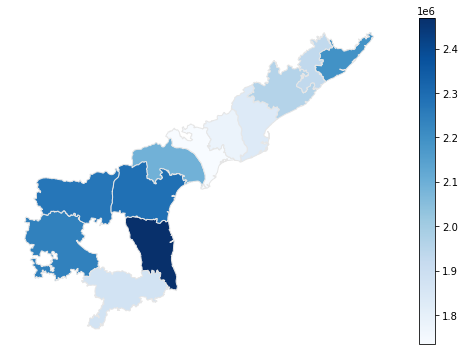

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
df.plot(column='Population', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

## Exportar Notebook 
Primero, obtenemos el nombre del archivo

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

Exportamos todo el notebook. Código y resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --to html $nb_name 

Exportamos solo los resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --no-input --to html $nb_name 

Exportamos solo resultados, y sólo celdas que no tengan _tag=no_

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='{"no"}' --no-input --to html $nb_name 